# Plot viral titers
This Python Jupyter notebook analyzes the neutralization data.

Import Python modules:

In [1]:
import xml.etree.ElementTree as ElementTree

from IPython.display import display, HTML, SVG

import matplotlib.pyplot as plt

import pandas as pd

from plotnine import *

import svgutils.compose

Read in the titer data:

In [2]:
titers = pd.read_csv('viral_titers.csv')

display(HTML(titers.to_html(index=False)))

name,comparison,titer,replicate
1984,virus,4.401059e+07,1
1992,virus,3.674175e+07,1
2001,virus,3.252061e+07,1
2008,virus,1.521004e+07,1
2016,virus,3.721168e+07,1
RBD-chimera-1992,virus,8.596787e+06,1
RBD-chimera-2001,virus,3.018147e+07,1
RBD-chimera-2008,virus,2.807571e+07,1
RBD-chimera-2016,virus,2.568473e+07,1
APN only,cells,1.050000e-01,1


Plot the titers:

Saving plot to results/titers_transduction_units___ml.svg


/fh/fast/bloom_j/software/miniconda3/envs/CoV_229E_antigenic_drift/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
/fh/fast/bloom_j/software/miniconda3/envs/CoV_229E_antigenic_drift/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10


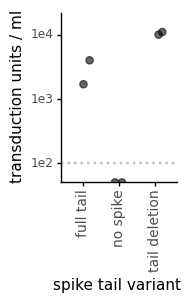

Saving plot to results/titers_relative_titer.svg


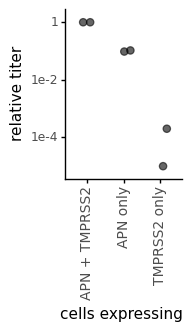

Saving plot to results/titers_RLU___ml.svg


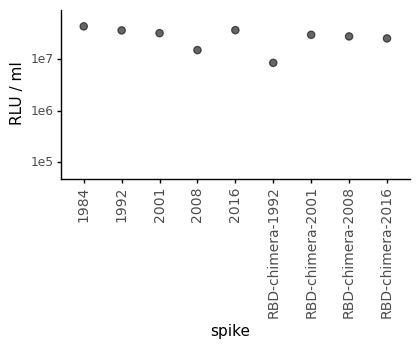

In [3]:
svgs = []

for group, xlabel, ylabel, ymin in [                         
                                    ('ZsGreen_titer', 'spike tail variant', 'transduction units / ml', 1e2),
                                    ('cells', 'cells expressing', 'relative titer', None),
                                    ('virus', 'spike', 'RLU / ml', 1e5),
                                    ]:
    df = titers.query('comparison == @group')
    if ymin is None:
        ymin = df['titer'].min()
        lod = None
    elif df['titer'].min() < ymin:
        lod = ymin
    else:
        lod = None
    p = (ggplot(df) +
         aes('name', 'titer') +
         geom_jitter(size=2.5, alpha=0.6, height=0, width=0.2 * (df['replicate'].nunique() - 1),
                     random_state=4) +
         xlab(xlabel) +
         scale_y_log10(name=ylabel,
                       limits=(0.67 * max(ymin, min(ymin, df['titer'].min())),
                               1.5 * df['titer'].max())) +
         theme_classic() +
         theme(axis_text_x=element_text(angle=90, size=10),
               figure_size=(0.5 * df['name'].nunique(), 2.2)
               )
         )
    if lod:
        p = p + geom_hline(yintercept=lod, linetype='dotted', color='gray', alpha=0.5, size=1)
    svg = f"results/titers_{ylabel.replace(' ', '_').replace('/', '_')}.svg"
    svgs.append(svg)
    print(f"Saving plot to {svg}")
    p.save(svg, verbose=False)
    fig = p.draw()
    display(fig)
    plt.close(fig)

Use [svgutils](https://svgutils.readthedocs.io/) to assemble panels into a plot:

In [4]:
titers_fig_svg = 'results/viral_titers_fig.svg'
print(f"Creating titer figure SVG as {titers_fig_svg}")

def svg_dim(svgfile, dim):
    """Get width or height `dim` of `svgfile` in points."""
    return float(ElementTree.parse(svgfile)
                            .getroot().attrib[dim]
                            .replace('px', '')
                            .replace('pt', '')
                            )

top_padding = 10
horiz_padding = 30

svgutils.compose.Figure(
    sum([svg_dim(svg, 'width') for svg in svgs]) + horiz_padding * (len(svgs) - 1),
    max([svg_dim(svg, 'height') for svg in svgs]) + top_padding,
    svgutils.compose.Panel(
        svgutils.compose.SVG(svgs[0]),
        svgutils.compose.Text('A', 2, 4, size=18, font='Arial'),
        ).move(0, top_padding),
    svgutils.compose.Panel(
        svgutils.compose.SVG(svgs[1]),
        svgutils.compose.Text('B', 2, 4, size=18, font='Arial'),
        ).move(svg_dim(svgs[0], 'width') + horiz_padding, top_padding),
    svgutils.compose.Panel(
        svgutils.compose.SVG(svgs[2]),
        svgutils.compose.Text('C', 2, 4, size=18, font='Arial'),
        ).move(svg_dim(svgs[0], 'width') + svg_dim(svgs[1], 'width') + 2 * horiz_padding,
               top_padding)
    ).save(titers_fig_svg)

display(SVG(titers_fig_svg))

Creating titer figure SVG as results/viral_titers_fig.svg
